In [14]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv(r'D:\Kuliah\Semester 5\PMDPM\Unsupervised Learning (Praktek)\Tugas4_A_11807\credit_card.csv')


In [15]:
print("data null \n", credit.isnull().sum())
print("data kosong \n", credit.empty)
print("data nan \n", credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [16]:
df_credit = credit.drop(['Customer Key', 'Sl_No'], axis = 1)
df_credit.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


<Axes: >

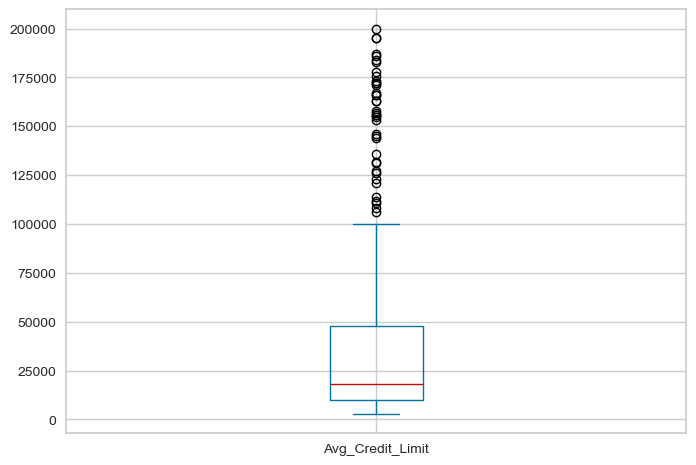

In [17]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum dibuang outlier: 660
Jumlah data sesudah dibuang outlier: 621


<Axes: >

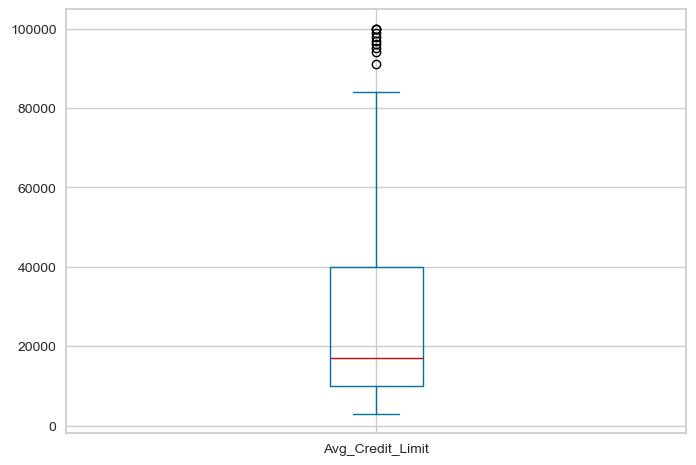

In [18]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):
    data_frame_out = data_frame.copy()
    if is_numeric_dtype(data_frame[kolom_outlier]):
            q1 = data_frame[kolom_outlier].quantile(0.25)
            q3 = data_frame[kolom_outlier].quantile(0.75)

            iqr = q3 - q1
            batas_atas = q3 + (1.5 * iqr)
            batas_bawah = q1 - (1.5 * iqr)

            data_frame_out = data_frame_out.loc[(data_frame_out[kolom_outlier] >= batas_bawah) & (data_frame_out[kolom_outlier] <= batas_atas)]
    return data_frame_out

data_bersih = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("Jumlah data sebelum dibuang outlier:", df_credit.shape[0])
print("Jumlah data sesudah dibuang outlier:", data_bersih.shape[0])

data_bersih['Avg_Credit_Limit'].plot(kind='box')

In [19]:
data_bersih.values

array([[100000,      2,      1,      1,      0],
       [ 50000,      3,      0,     10,      9],
       [ 50000,      7,      1,      3,      4],
       ...,
       [ 95000,     10,      0,     15,      1],
       [ 99000,     10,      1,     10,      0],
       [ 84000,     10,      1,     13,      2]], dtype=int64)

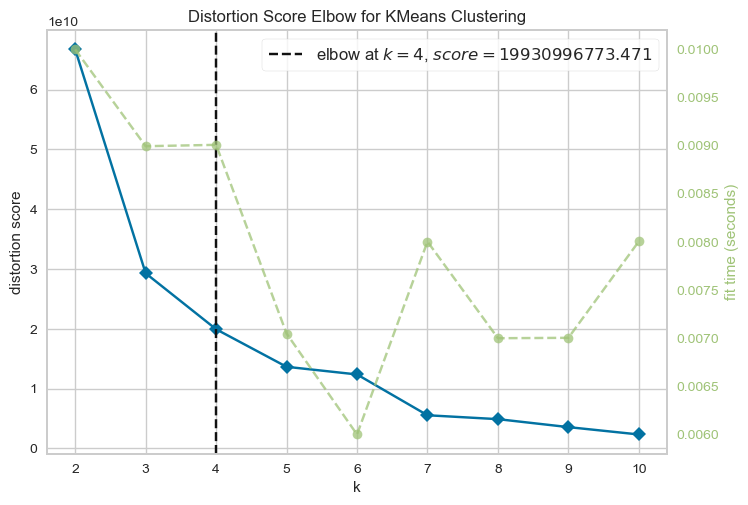

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans(random_state=7)
vis = KElbowVisualizer(kMeansC, k=(2,11))
vis.fit(data_bersih)

vis.show()

Silhouette Score K-Means for  2  clusters: 0.7275517813087928
Silhouette Score K-Means for  3  clusters: 0.7058100919802311
Silhouette Score K-Means for  4  clusters: 0.6772479571163517
Silhouette Score K-Means for  5  clusters: 0.5978439725030787
Silhouette Score K-Means for  6  clusters: 0.5667593250129869
Silhouette Score K-Means for  7  clusters: 0.5988823996531906
Silhouette Score K-Means for  8  clusters: 0.6032277793489439
Silhouette Score K-Means for  9  clusters: 0.5847508253512035
Silhouette Score K-Means for  10  clusters: 0.6020585430615665


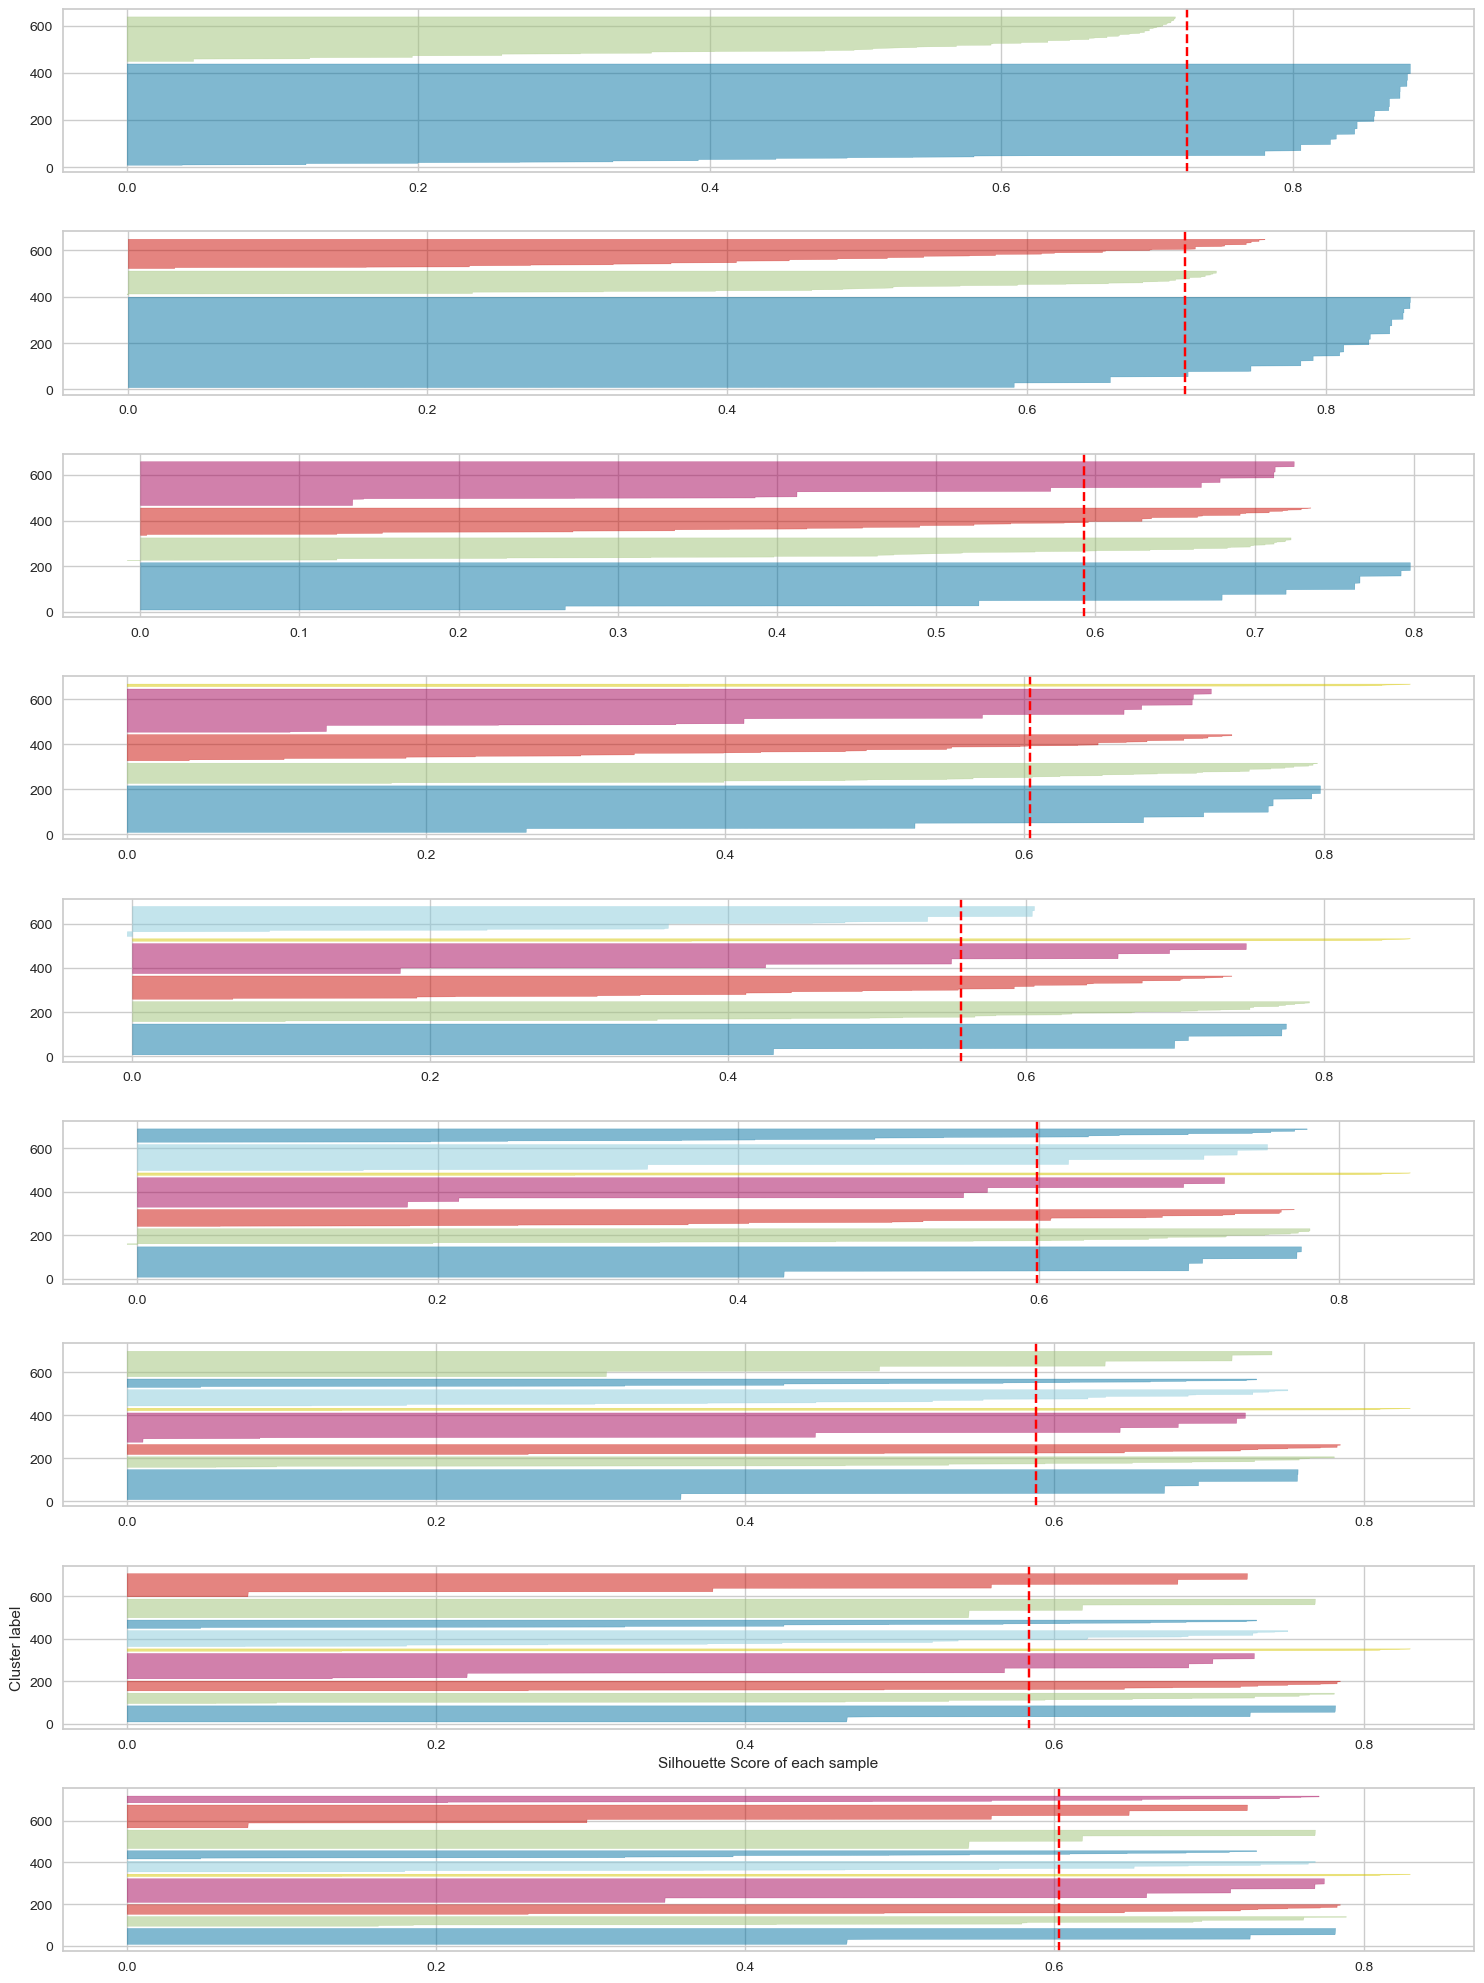

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9, 1, figsize=(15, 20))

for k in np.arange(2, 11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=7)
    
    KM_clusters = kMeansC.fit_predict(data_bersih)
    print("Silhouette Score K-Means for ", k, " clusters:", silhouette_score(data_bersih, KM_clusters))
    
    sil_vis = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=0), colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(data_bersih)

ax[-2].set(xlabel='Silhouette Score of each sample', ylabel='Cluster label')

plt.tight_layout()
plt.show()

In [22]:
data_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

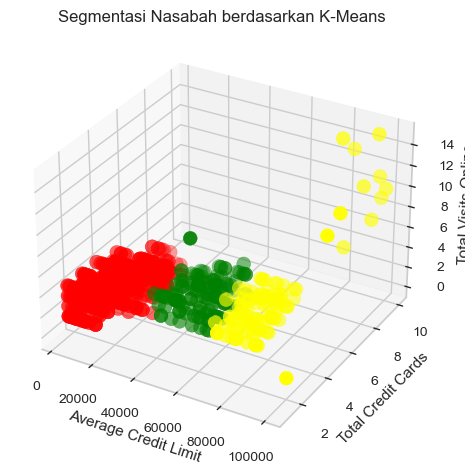

Silhouette Score K-Means: 0.706


In [23]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=7)
k_clusters = kmeans.fit_predict(data_bersih.values)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4: 'magenta', 5: 'black', 6: 'cyan'}

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=[cluster_colors[i] for i in k_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, k_clusters))


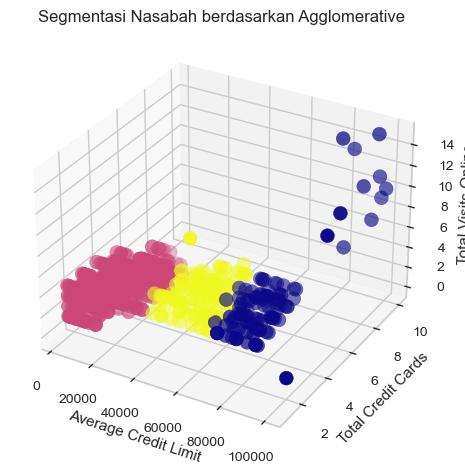

Silhouette Score K-Means: 0.705


In [24]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(data_bersih)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, AGG_clusters))


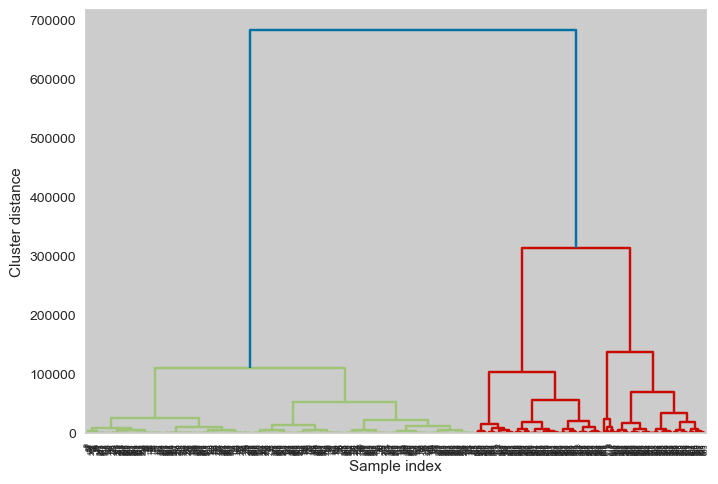

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(data_bersih, method='ward')
dendrogram(linkage_array) 

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()


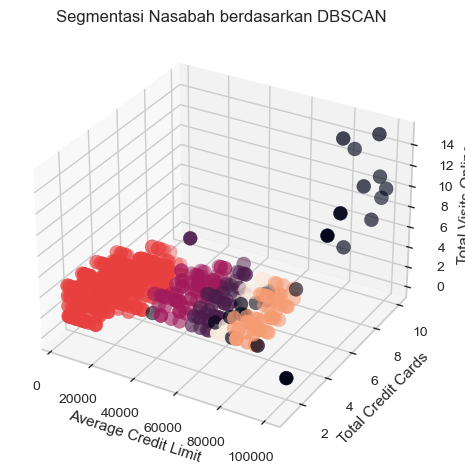

Silhouette Score K-Means: 0.657


In [26]:
DBSC = DBSCAN(min_samples=20, eps=2500)

DBSC_clusters = DBSC.fit_predict(data_bersih)

from matplotlib.colors import ListedColormap 

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex()) 

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=DBSC_clusters, cmap=cmap, s=100) 

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit') 
ax.set_ylabel('Total Credit Cards') 
ax.set_zlabel('Total Visits Online') 
plt.show() 

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, DBSC_clusters))

In [27]:
import pickle 

with open('KMeans_model.pkl','wb') as r:
    pickle.dump((kmeans),r)

with open('AGG_model.pkl','wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl','wb') as r:
    pickle.dump((DBSC),r)

print("Model Berhasil disimpan")

Model Berhasil disimpan
